In [2]:
import os 
import pandas as pd
dir = 'archive'
print(os.listdir(dir))



['hatespeech_keywords.txt', 'img_resized', 'img_txt', 'img_txt2', 'MMHS150K_GT.json', 'MMHS150K_readme.txt', 'splits']


Below is the basic data analysing, number of entries, understanding the dataset etc.

In [3]:
splits_path = os.path.join(dir, 'splits/')
print(os.listdir(splits_path))

['test_ids.txt', 'train_ids.txt', 'val_ids.txt']


In [4]:
def read_ids(path):
    with open(path) as f:
        lines = f.readlines()
        lines = [x.strip() for x in lines]
        
        return lines

In [5]:
train_id_path = os.path.join(splits_path, 'train_ids.txt')
val_id_path = os.path.join(splits_path, 'val_ids.txt')
test_id_path = os.path.join(splits_path, 'test_ids.txt')

train_ids = read_ids(train_id_path)
val_ids = read_ids(val_id_path)
test_ids = read_ids(test_id_path)

In [6]:
print(f"Training data size: {len(train_ids)}")
print(f"Validation data size: {len(val_ids)}")
print(f"Testing data size: {len(test_ids)}")

Training data size: 134823
Validation data size: 5000
Testing data size: 10000


In [7]:
#testing to see accuracy of OCR: tesseract  
#result: not very accurate
#example given below for reference, the image had a text saying" BUILD THAT WALL"
import pytesseract
from PIL import Image

image = Image.open("C:\\Users\\Dell\\Desktop\\ML\\archive\\img_resized\\1024061318540619781.jpg")

text = pytesseract.image_to_string(image)
print(text)


BUILD
HAT
WALL



In [8]:
image = Image.open("C:\\Users\\Dell\\Desktop\\ML\\archive\\img_resized\\1024317611901890562.jpg")
image = Image.open("C:\\Users\\Dell\\Desktop\\ML\\archive\\img_resized\\1024508024696786944.jpg")


text = pytesseract.image_to_string(image)
print(text)

NO be me un minute

pa y SN

I'm all up in mah feelin's



Conclusion from the above:
img_txt file that came with the dataset is more accurate than an OCR


In [9]:
train_df = pd.read_csv('archive\\splits\\test_ids.txt', header=None)
train_df.columns = ['id']
train_df.tail(10)
# valid_df = pd.read_csv('/kaggle/input/multimodal-hate-speech/splits/val_ids.txt', header=None)
# valid_df.columns = ['id']
# test_df = pd.read_csv('/kaggle/input/multimodal-hate-speech/splits/test_ids.txt', header=None)
# test_df.columns = ['id']

,id
9990,1108526865206202368
9991,1110061807291588609
9992,1056325053862871040
9993,1064037095860105217
9994,1108959275609546754
9995,1109972327897460736
9996,1106756324803731456
9997,1114945824851730434
9998,1105122471743635456
9999,1114810734872023040


In [10]:
import os
from collections import Counter

directory = 'archive\img_resized'
files = os.listdir(directory)

#occurence of each extension
file_extensions = [os.path.splitext(file)[1].lower() for file in files]
extension_counts = Counter(file_extensions)
for ext, count in extension_counts.items():
    print(f"Extension: {ext}, Count: {count}")


Extension: .jpg, Count: 150000


PRE-PROCESSING

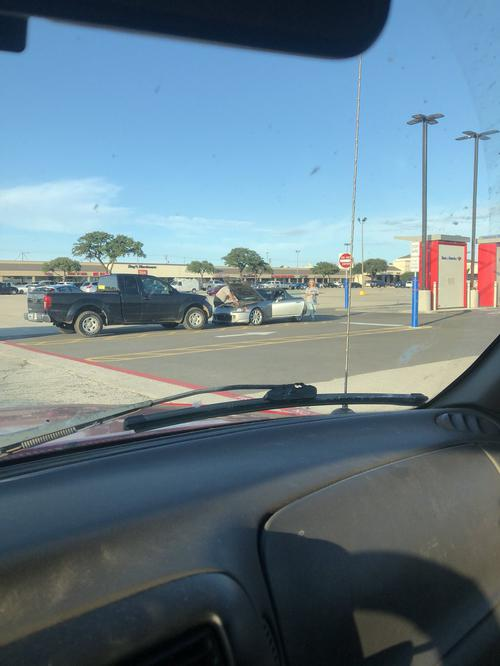

In [11]:
import random
from PIL import Image
from IPython.display import display

image_dir = 'archive\img_resized'
text_dir = 'archive\img_txt'

image_files = os.listdir(image_dir)
text_files = os.listdir(text_dir)

# Remove file extensions to get the base filenames
image_base_names = [os.path.splitext(file)[0] for file in image_files]
text_base_names = [os.path.splitext(file)[0] for file in text_files]

# Find image files without corresponding text files
images_without_text = [img for img in image_base_names if img not in text_base_names]

# Randomly select an image without text
if images_without_text:
    selected_image_name = random.choice(images_without_text)
    selected_image_path = os.path.join(image_dir, selected_image_name + '.jpg')

    img = Image.open(selected_image_path)
    display(img)
else:
    print("No images without corresponding text files found.")


Text Content:



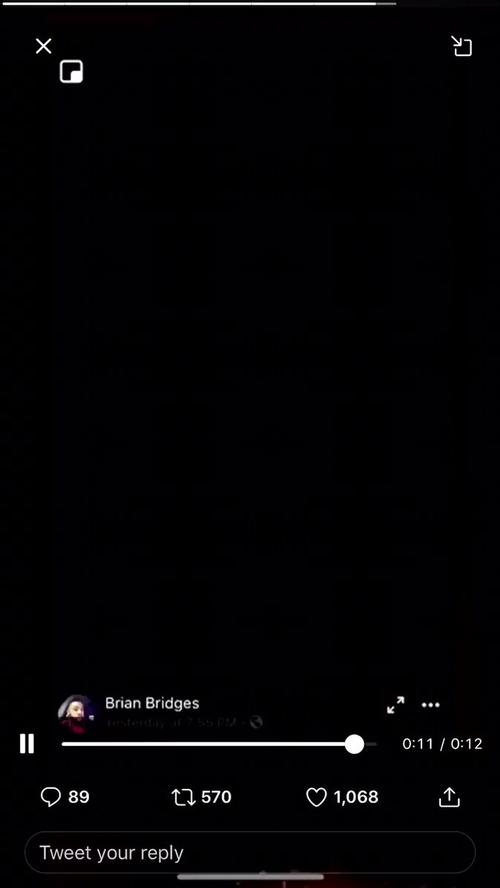

In [12]:
import os
import random
import json
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

image_dir = 'archive\img_resized'
json_dir = 'archive\img_txt'

image_files = os.listdir(image_dir)
json_files = [file for file in os.listdir(json_dir) if file.endswith('.json')]

# Remove file extensions to get the base filenames
image_base_names = [os.path.splitext(file)[0] for file in image_files]

# Find image files with corresponding JSON files
images_with_text = [img for img in image_base_names if f'{img}.json' in json_files]

# Randomly select an image with text
if images_with_text:
    selected_image_name = random.choice(images_with_text)
    selected_image_path = os.path.join(image_dir, selected_image_name + '.jpg')
    selected_json_path = os.path.join(json_dir, selected_image_name + '.json')

    # Read and display the text content from the JSON file
    with open(selected_json_path, 'r') as json_file:
        json_data = json.load(json_file)
        text_content = json_data.get("text", "")

        print("Text Content:")
        print(text_content)

    img = Image.open(selected_image_path)
    display(img)
else:
    print("No images with corresponding JSON files found.")


Text Content:
POLITICAL CORRECTNESS OFFENDS ME 


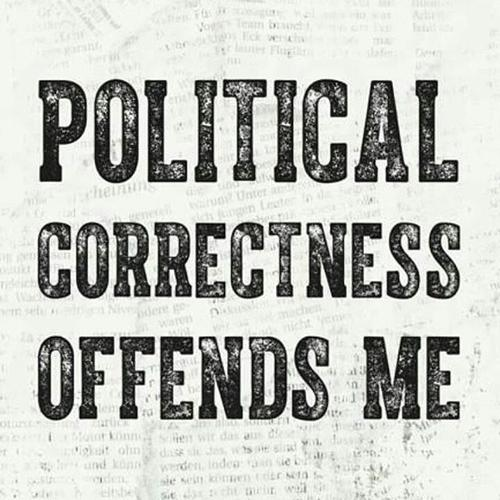

In [13]:
import os
import random
import json
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

image_dir = 'archive\img_resized'

json_dir = 'archive\img_txt'

image_files = os.listdir(image_dir)
json_files = [file for file in os.listdir(json_dir) if file.endswith('.json')]

image_base_names = [os.path.splitext(file)[0] for file in image_files]

images_with_text = [img for img in image_base_names if f'{img}.json' in json_files]

# Randomly select an image with text
if images_with_text:
    selected_image_name = random.choice(images_with_text)
    selected_image_path = os.path.join(image_dir, selected_image_name + '.jpg')
    selected_json_path = os.path.join(json_dir, selected_image_name + '.json')

    # Read and display the text content from the JSON file
    with open(selected_json_path, 'r') as json_file:
        json_data = json.load(json_file)
        text_content = json_data.get("img_text", "")  # Extract text using the key "img_text"

        print("Text Content:")
        print(text_content)

    img = Image.open(selected_image_path)
    display(img)
else:
    print("No images with corresponding JSON files found.")


In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Sample text
text = "Text preprocessing is an essential step in natural language processing. It involves various techniques."

# Lowercasing
text = text.lower()

# Tokenization
tokens = word_tokenize(text)

# Removing special characters and punctuation
table = str.maketrans('', '', string.punctuation)
tokens = [word.translate(table) for word in tokens]

# Removing stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Joining the tokens back into a clean text
clean_text = ' '.join(filtered_tokens)

print("Original Text:")
print(text)
print("\nCleaned Text:")
print(clean_text)


Original Text:
text preprocessing is an essential step in natural language processing. it involves various techniques.

Cleaned Text:
text preprocessing essential step natural language processing  involves various techniques 


In [16]:
import os
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

input_folder = 'archive\img_txt'  

output_folder = 'archive/img_txt2'  

os.makedirs(output_folder, exist_ok=True)

def clean_text(text):
    # Lowercasing
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing special characters and punctuation
    table = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(table) for word in tokens]
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Joining the tokens back into a clean text
    clean_text = ' '.join(filtered_tokens)
    
    return clean_text

# Loop through JSON files, clean text, and save to the output folder
for json_file in os.listdir(input_folder):
    if json_file.endswith('.json'):
        with open(os.path.join(input_folder, json_file), 'r', encoding='utf-8') as file:
            data = json.load(file)
            img_text = data.get('img_text', '')  # Replace 'img_text' with the actual key in your JSON
            
            cleaned_text = clean_text(img_text)
            
            # Update the JSON data with cleaned text
            data['img_text'] = cleaned_text
            
        # Save the updated JSON file to the output folder
        output_file_path = os.path.join(output_folder, json_file)
        with open(output_file_path, 'w', encoding='utf-8') as file:
            json.dump(data, file, ensure_ascii=False, indent=4)


--


In [12]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
num_classes=2
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

# Tokenize your text data
train_ids='archive\splits\train_ids.txt'
text_samples = len(train_ids)
max_seq_length=128
labels=['class1', 'class2', 'class3']
tokens = tokenizer(text_samples, padding=True, truncation=True, return_tensors='pt', max_length=max_seq_length)

# Prepare input tensors
input_ids = tokens['input_ids']
attention_mask = tokens['attention_mask']

# Define optimizer and loss function
learning_rate = 2e-5
optimizer = AdamW(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss()

# Fine-tuning loop
num_epochs=3
labels=0
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()

# Evaluation
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    predicted_labels = torch.argmax(outputs.logits, dim=1)

# Make predictions on new data
new_text_samples = ["This is a new text.", "Another example text."]
new_tokens = tokenizer(new_text_samples, padding=True, truncation=True, return_tensors='pt')
new_input_ids = new_tokens['input_ids']
new_attention_mask = new_tokens['attention_mask']

with torch.no_grad():
    new_outputs = model(new_input_ids, attention_mask=new_attention_mask)
    new_predicted_labels = torch.argmax(new_outputs.logits, dim=1)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

Replicate of BERt using python libraires

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Load your dataset (replace 'your_dataset.csv' with your dataset file)
df = pd.read_csv('archive\img_txt')

# Assuming your dataset has 'tweet_text' and 'labels' columns
texts = df['tweet_text'].tolist()
labels = df['labels'].tolist()

# Tokenize the texts using a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts = [tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='pt') for text in texts]

# Convert labels to a tensor
labels = torch.tensor(labels)

# Split your dataset into training, validation, and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(tokenized_texts, labels, test_size=0.2, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(test_texts, test_labels, test_size=0.5, random_state=42)

# Create PyTorch DataLoader objects for your training, validation, and test sets
batch_size = 32

train_data = TensorDataset(train_texts, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_texts, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

test_data = TensorDataset(test_texts, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

# Define the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * num_epochs)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}'):
        inputs, labels = batch
        inputs = {k: v for k, v in inputs.items()}
        labels = labels
        model.zero_grad()
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}, Average Training Loss: {avg_loss:.4f}')

# Save the trained model
model.save_pretrained('hate_speech_model')

# Evaluation function
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Evaluating'):
            inputs, labels = batch
            inputs = {k: v for k, v in inputs.items()}
            labels = labels
            outputs = model(**inputs)
            _, preds = torch.max(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds)
    return accuracy, report

# Evaluate on the validation set
val_accuracy, val_report = evaluate_model(model, val_dataloader)
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation Classification Report:\n{val_report}')

# Evaluate on the test set
test_accuracy, test_report = evaluate_model(model, test_dataloader)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Classification Report:\n{test_report}')


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Load JSON files for each image in your dataset folder
data_folder = 'archive\img_txt'  # Replace with your dataset folder path
json_files = [f for f in os.listdir(data_folder) if f.endswith('.json')]

# Initialize empty lists to store texts and labels
texts = []
labels = []

# Loop through JSON files and extract text and labels
for json_file in json_files:
    with open(os.path.join(data_folder, json_file), 'r', encoding='utf-8') as file:
        data = json.load(file)
        img_text = data.get('img_text', '')  # Replace 'img_text' with the actual key in your JSON
        labels_str = data.get('labels_str', '')  # Replace 'labels_str' with the actual key in your JSON
        texts.append(img_text)
        labels.append(labels_str)

# Tokenize the texts using a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts = [tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='pt') for text in texts]

# Convert labels to a tensor
labels = torch.tensor(labels)

# Split your dataset into training, validation, and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(tokenized_texts, labels, test_size=0.2, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(test_texts, test_labels, test_size=0.5, random_state=42)

# Create PyTorch DataLoader objects for your training, validation, and test sets
batch_size = 32

train_data = TensorDataset(train_texts, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_texts, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

test_data = TensorDataset(test_texts, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

# Define the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * num_epochs)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}'):
        inputs, labels = batch
        inputs = {k: v for k, v in inputs.items()}
        labels = labels
        model.zero_grad()
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}, Average Training Loss: {avg_loss:.4f}')

# Save the trained model
model.save_pretrained('hate_speech_model')

# Evaluation function
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Evaluating'):
            inputs, labels = batch
            inputs = {k: v for k, v in inputs.items()}
            labels = labels
            outputs = model(**inputs)
            _, preds = torch.max(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds)
    return accuracy, report

# Evaluate on the validation set
val_accuracy, val_report = evaluate_model(model, val_dataloader)
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation Classification Report:\n{val_report}')

# Evaluate on the test set
test_accuracy, test_report = evaluate_model(model, test_dataloader)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Classification Report:\n{test_report}')


In [13]:
import os
import json
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the pre-trained tokenizer and model fine-tuned for hate speech detection
tokenizer = BertTokenizer.from_pretrained('fine_tuned_hate_speech_model')
model = BertForSequenceClassification.from_pretrained('fine_tuned_hate_speech_model')

# Directory containing JSON files for each image
data_folder = 'archive\img_txt'  # Replace with the path to your dataset folder
json_files = [f for f in os.listdir(data_folder) if f.endswith('.json')]

# Initialize an empty list to store hate speech predictions
hate_speech_predictions = []

# Loop through JSON files and predict hate speech
for json_file in json_files:
    with open(os.path.join(data_folder, json_file), 'r', encoding='utf-8') as file:
        data = json.load(file)
        img_text = data.get('img_text', '')  # Replace 'img_text' with the actual key in your JSON

        # Tokenize and encode the text data
        encoded_data = tokenizer([img_text], padding=True, truncation=True, return_tensors='pt', max_length=128)

        # Use the model for prediction
        with torch.no_grad():
            outputs = model(**encoded_data)

        # Extract the predicted class probabilities
        logits = outputs.logits
        predicted_probabilities = torch.softmax(logits, dim=1)

        # Interpret the predictions (assuming binary classification)
        threshold = 0.5  # Adjust as needed
        predicted_label = (predicted_probabilities[0, 1] > threshold).int()

        # Store the prediction result
        hate_speech_predictions.append({
            'json_file': json_file,
            'text': img_text,
            'is_hate_speech': bool(predicted_label)
        })

# Now, 'hate_speech_predictions' contains the predictions for each text
# You can process or save these predictions as needed


OSError: fine_tuned_hate_speech_model is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [18]:
from transformers import BertForSequenceClassification, BertTokenizer

model_name = "Hate-speech-CNERG/bert-base-uncased-hatexplain"
project_directory = r"C:\Users\Dell\Desktop\ML"

# Load the pre-trained model and tokenizer to your project directory
model = BertForSequenceClassification.from_pretrained(model_name, local_files_only=True, cache_dir=project_directory)
tokenizer = BertTokenizer.from_pretrained(model_name, cache_dir=project_directory)


OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like Hate-speech-CNERG/bert-base-uncased-hatexplain is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [ ]:
import os
import json
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Define the path to your local model directory
model_dir = 'path/to/your/local/model_directory'

# Load the pre-trained tokenizer and model fine-tuned for hate speech detection
tokenizer = BertTokenizer.from_pretrained(model_dir)
model = BertForSequenceClassification.from_pretrained(model_dir)

# Directory containing JSON files for each image
data_folder = 'archive/img_txt'  # Replace with the path to your dataset folder
json_files = [f for f in os.listdir(data_folder) if f.endswith('.json')]

# Initialize an empty list to store hate speech predictions
hate_speech_predictions = []

# Loop through JSON files and predict hate speech
for json_file in json_files:
    with open(os.path.join(data_folder, json_file), 'r', encoding='utf-8') as file:
        data = json.load(file)
        img_text = data.get('img_text', '')  # Replace 'img_text' with the actual key in your JSON

        # Tokenize and encode the text data
        encoded_data = tokenizer([img_text], padding=True, truncation=True, return_tensors='pt', max_length=128)

        # Use the model for prediction
        with torch.no_grad():
            outputs = model(**encoded_data)

        # Extract the predicted class probabilities
        logits = outputs.logits
        predicted_probabilities = torch.softmax(logits, dim=1)

        # Interpret the predictions (assuming binary classification)
        threshold = 0.5  # Adjust as needed
        predicted_label = (predicted_probabilities[0, 1] > threshold).int()

        # Store the prediction result
        hate_speech_predictions.append({
            'json_file': json_file,
            'text': img_text,
            'is_hate_speech': bool(predicted_label)
        })

# Now, 'hate_speech_predictions' contains the predictions for each text
# You can process or save these predictions as needed


In [17]:
import os
import json
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define your data folder
data_folder = 'archive\img_txt2'  # Replace with the correct path

# Initialize NLTK's stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Initialize NLTK's word tokenizer
nltk.download('punkt')

# Function for text preprocessing
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing special characters and punctuation
    table = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(table) for word in tokens]

    # Removing stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Joining the tokens back into a clean text
    clean_text = ' '.join(filtered_tokens)

    return clean_text

# Loop through JSON files in the data folder
output_folder = 'archive/img_txt2_preprocessed'  # Replace with the desired output folder
os.makedirs(output_folder, exist_ok=True)

for json_file in os.listdir(data_folder):
    with open(os.path.join(data_folder, json_file), 'r', encoding='utf-8') as file:
        data = json.load(file)
        img_text = data.get('img_text', '')  # Replace 'img_text' with the actual key in your JSON

        # Preprocess the text
        cleaned_text = preprocess_text(img_text)

        # Save the cleaned text to a new JSON file in the output folder
        output_file = os.path.join(output_folder, json_file)
        with open(output_file, 'w', encoding='utf-8') as output:
            json.dump({'cleaned_text': cleaned_text}, output, ensure_ascii=False)

print("Text preprocessing and tokenization complete.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text preprocessing and tokenization complete.


In [31]:
import os
import json
import torch
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define your data folder
data_folder = 'archive/img_txt2_preprocessed'  # Replace with the correct path

# Initialize an empty list to store encoded text
encoded_texts = []

# Loop through the cleaned text files
for json_file in os.listdir(data_folder):
    with open(os.path.join(data_folder, json_file), 'r', encoding='utf-8') as file:
        data = json.load(file)
        cleaned_text = data.get('cleaned_text', '')  # Replace 'cleaned_text' with the actual key in your JSON

        # Tokenize and encode the cleaned text
        input_ids = tokenizer.encode(cleaned_text, add_special_tokens=True, truncation=True, max_length=128, padding='max_length', return_tensors='pt')

        # Append the encoded text to the list
        encoded_texts.append(input_ids)

# Now, the 'encoded_texts' list contains the encoded text suitable for input to the BERT model


In [38]:
import os
import json
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler

# Load your BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Directory containing JSON files for each image
data_folder = 'archive/img_txt2_preprocessed'  

# Load the tweet IDs from the train, validation, and test files
with open('archive\splits\\train_ids.txt', 'r') as file:
    train_ids = [line.strip() for line in file]

with open('archive\splits\\val_ids.txt', 'r') as file:
    val_ids = [line.strip() for line in file]

with open('archive\splits\\test_ids.txt', 'r') as file:
    test_ids = [line.strip() for line in file]

# Initialize an empty list to store hate speech predictions
hate_speech_predictions = []

# Loop through JSON files and predict hate speech for each split
for json_file in os.listdir(data_folder):
    with open(os.path.join(data_folder, json_file), 'r', encoding='utf-8') as file:
        data = json.load(file)
        img_text = data.get('cleaned_text', '')  # Replace 'img_text' with the actual key in your JSON
        tweet_id = json_file.split('.')[0]  # Assuming the filename is the tweet ID

        # Check which split the tweet belongs to
        if tweet_id in train_ids:
            split = 'train'
        elif tweet_id in val_ids:
            split = 'val'
        elif tweet_id in test_ids:
            split = 'test'
        else:
            split = 'unknown'

        if split != 'unknown':
            # Tokenize and encode the text data
            encoded_data = tokenizer(img_text, padding=True, truncation=True, return_tensors='pt', max_length=128)

            # Use the model for prediction
            with torch.no_grad():
                outputs = model(**encoded_data)

            # Extract the predicted class probabilities
            logits = outputs.logits
            predicted_probabilities = torch.softmax(logits, dim=1)

            # Interpret the predictions (assuming binary classification)
            threshold = 0.5  # Adjust as needed
            predicted_label = (predicted_probabilities[0, 1] > threshold).int()

            # Store the prediction result along with the split information
            hate_speech_predictions.append({
                'json_file': json_file,
                'text': img_text,
                'split': split,
                'is_hate_speech': bool(predicted_label)
            })

# Now, 'hate_speech_predictions' contains the predictions for each text along with the split information
# You can process or save these predictions as needed

# Example: Saving the predictions to a JSON file
with open('hate_speech_predictions.json', 'w', encoding='utf-8') as output_file:
    json.dump(hate_speech_predictions, output_file, ensure_ascii=False)

print("Hate speech predictions completed.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
